In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS
from graphviz import Digraph
from linearmodels import PanelOLS
import zipfile

List of Causal Effects:

Earth quake affects monetary policy https://www.sciencedirect.com/science/article/pii/S0164070418304026

Dynamics of Tokyo Electric Power Company and the Nikkei https://www.jstor.org/stable/26418774

Global Seismic Data: https://www.globalquakemodel.org/product/global-seismic-hazard-map

Global Earthquake Exposure Model (Data for exposure model): https://github.com/gem/global_exposure_model

Global Earthquake Vulnerability Model (Data for vulnerability model): https://github.com/gem/global_vulnerability_model/

Japanese Municipal Bonds (quarterly): https://needs.nikkei.co.jp/services/jsprice/#sample

Japanese Municipal Bonds (daily): https://www.mcnnns77.net/market-data

Mesh code and prefectures: https://www.stat.go.jp/data/mesh/m_itiran.html

Earthquake probability (Seismic Hazard Map): https://www.j-shis.bosai.go.jp/map/JSHIS2/download.html?lang=en (first four columns)

Earthquake probability documentation:
- https://www.j-shis.bosai.go.jp/map/JSHIS2/man/en/man_point_search.html
- https://www.j-shis.bosai.go.jp/map/JSHIS2/man/en/man_map_operation_c.html

How to calculate latitude and longitude from MeshCode (documentation in Japanese):
- https://www.stat.go.jp/data/mesh/pdf/gaiyo1.pdf#page=7

Total number of bond issued from 2002 for each city per year:
- https://www.soumu.go.jp/iken/kessan_jokyo_2.html

bond yield and previous bond. when n is large and t is small there is bias. can maybe include lag dependent variable.
Dynamic Panel. Instead of just earthquake dummy, include dummy for range of magnitude. Lags of dummy variables.

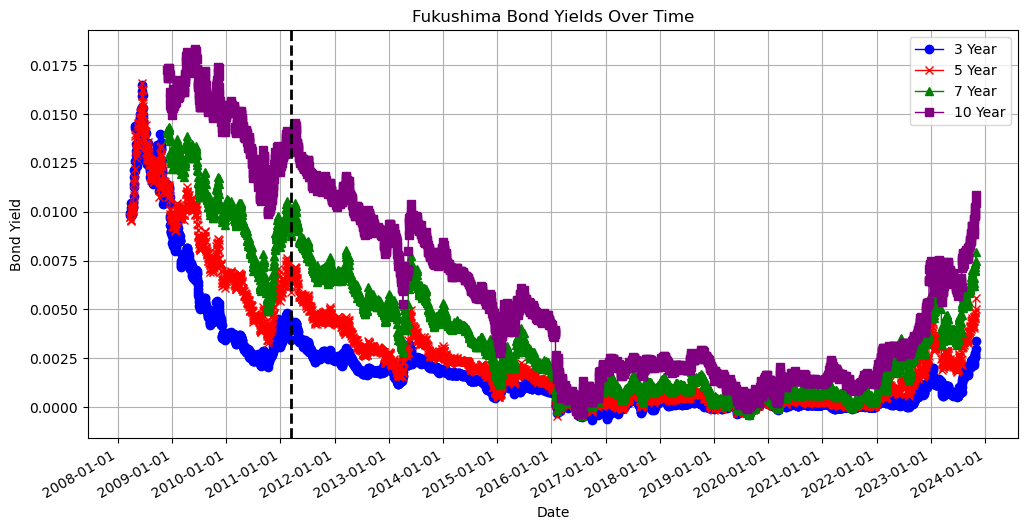

In [2]:
# Read in Fukushima data
data_Fukushima = pd.read_csv("data/Fukushima.csv")
data_Fukushima.iloc[:, 0] = pd.to_datetime(data_Fukushima.iloc[:, 0], unit='s')
data_Fukushima['Prefecture'] = 'Fukushima'

# Plotting 3 Year, 5 Year, 7 Year, and 10 Year bond yields
plt.figure(figsize=(12, 6))

# Plotting each maturity
plt.plot(data_Fukushima['Date'], data_Fukushima['3 Year'], label='3 Year', marker='o', linestyle='-', color='b' ,linewidth=1)
plt.plot(data_Fukushima['Date'], data_Fukushima['5 Year'], label='5 Year', marker='x', linestyle='-', color='r', linewidth=1)
plt.plot(data_Fukushima['Date'], data_Fukushima['7 Year'], label='7 Year', marker='^', linestyle='-', color='g', linewidth=1)
plt.plot(data_Fukushima['Date'], data_Fukushima['10 Year'], label='10 Year', marker='s', linestyle='-', color='purple', linewidth=1)

# Adding title and labels
plt.title('Fukushima Bond Yields Over Time')
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.legend()
plt.grid(True)

# Formatting the x-axis for better date display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.axvline(pd.Timestamp('2011-03-11'), color='black', linestyle='--', lw=2, label='March 11, 2011')

plt.show()


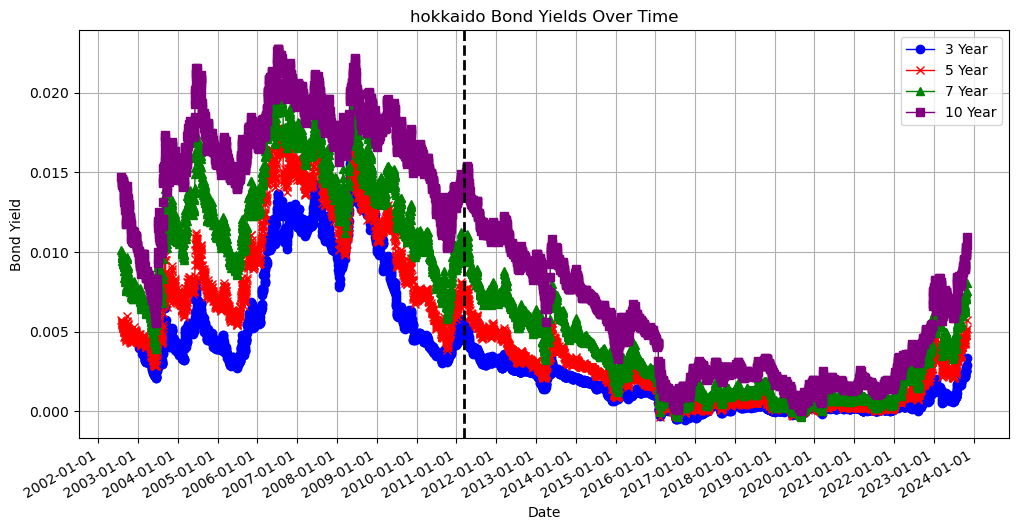

In [3]:
# Read in Hokkaido bond data
data_hokkaido = pd.read_csv("data/Hokkaido.csv")
data_hokkaido.iloc[:, 0] = pd.to_datetime(data_hokkaido.iloc[:, 0], unit='s')
data_hokkaido['Prefecture'] = 'Hokkaido'
data_hokkaido.head()

# Plotting 3 Year, 5 Year, 7 Year, and 10 Year bond yields
plt.figure(figsize=(12, 6))

# Plotting each maturity
plt.plot(data_hokkaido['Date'], data_hokkaido['3 Year'], label='3 Year', marker='o', linestyle='-', color='b' ,linewidth=1)
plt.plot(data_hokkaido['Date'], data_hokkaido['5 Year'], label='5 Year', marker='x', linestyle='-', color='r', linewidth=1)
plt.plot(data_hokkaido['Date'], data_hokkaido['7 Year'], label='7 Year', marker='^', linestyle='-', color='g', linewidth=1)
plt.plot(data_hokkaido['Date'], data_hokkaido['10 Year'], label='10 Year', marker='s', linestyle='-', color='purple', linewidth=1)

# Adding title and labels
plt.title('hokkaido Bond Yields Over Time')
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.legend()
plt.grid(True)

# Formatting the x-axis for better date display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.axvline(pd.Timestamp('2011-03-11'), color='black', linestyle='--', lw=2, label='March 11, 2011')

plt.show()


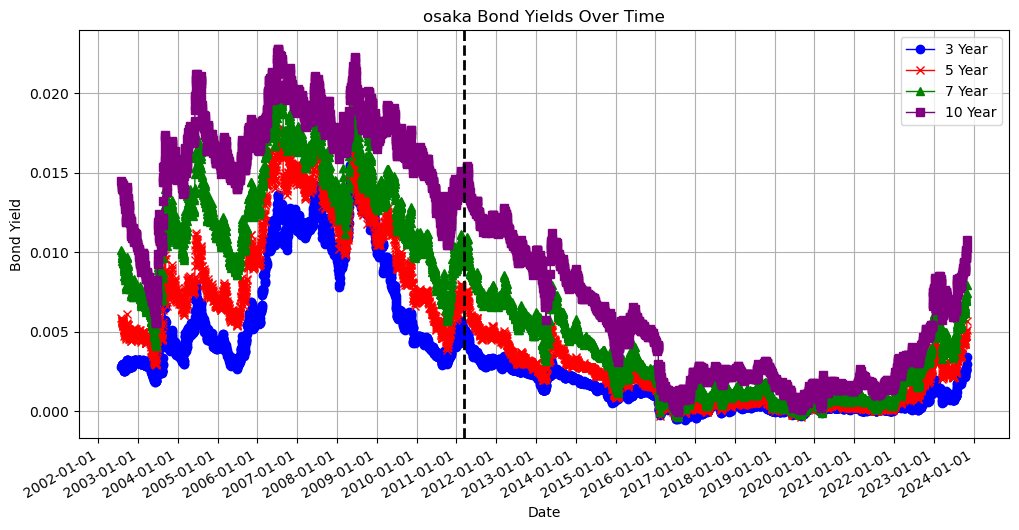

In [4]:
data_osaka = pd.read_csv("data/Osaka.csv")
data_osaka.iloc[:, 0] = pd.to_datetime(data_osaka.iloc[:, 0], unit='s')
data_osaka['Prefecture'] = 'Osaka'
data_osaka.head()

# Plotting 3 Year, 5 Year, 7 Year, and 10 Year bond yields
plt.figure(figsize=(12, 6))

# Plotting each maturity
plt.plot(data_osaka['Date'], data_osaka['3 Year'], label='3 Year', marker='o', linestyle='-', color='b' ,linewidth=1)
plt.plot(data_osaka['Date'], data_osaka['5 Year'], label='5 Year', marker='x', linestyle='-', color='r', linewidth=1)
plt.plot(data_osaka['Date'], data_osaka['7 Year'], label='7 Year', marker='^', linestyle='-', color='g', linewidth=1)
plt.plot(data_osaka['Date'], data_osaka['10 Year'], label='10 Year', marker='s', linestyle='-', color='purple', linewidth=1)

# Adding title and labels
plt.title('osaka Bond Yields Over Time')
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.legend()
plt.grid(True)

# Formatting the x-axis for better date display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.axvline(pd.Timestamp('2011-03-11'), color='black', linestyle='--', lw=2, label='March 11, 2011')

plt.show()

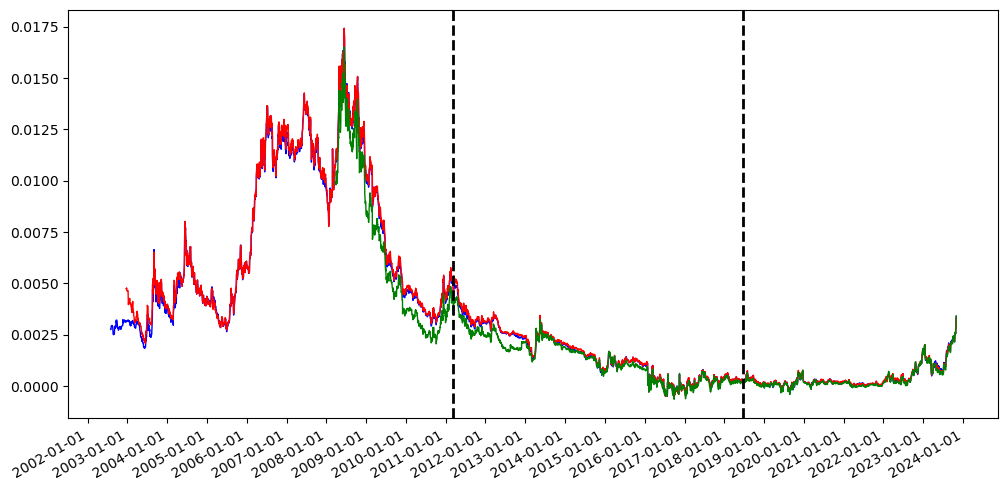

In [5]:
plt.figure(figsize=(12, 6))

# Plotting each maturity
plt.plot(data_osaka['Date'], data_osaka['3 Year'], label='3 Year',  linestyle='-', color='b' ,linewidth=1)
plt.plot(data_hokkaido['Date'], data_hokkaido['3 Year'], label='3 Year', linestyle='-', color='r' ,linewidth=1)
plt.plot(data_Fukushima['Date'], data_Fukushima['3 Year'], label='3 Year', linestyle='-', color='g' ,linewidth=1)

# Formatting the x-axis for better date display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.axvline(pd.Timestamp('2011-03-11'), color='black', linestyle='--', lw=2, label='March 11, 2011')
plt.axvline(pd.Timestamp('2018-06-18'), color='black', linestyle='--', lw=2)

plt.show()

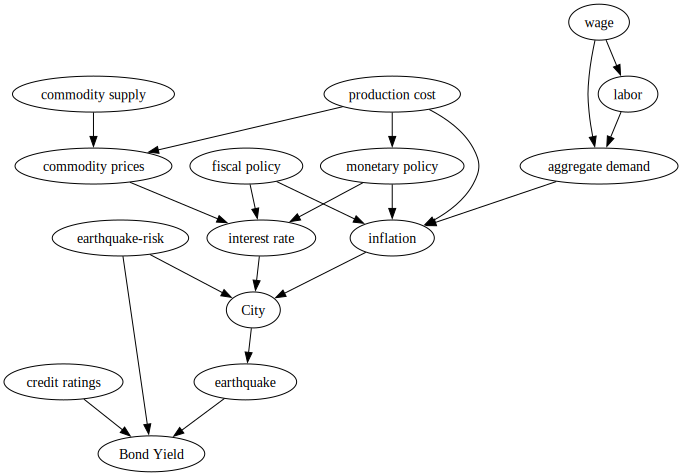

In [6]:
## TODO: make changes to the DAG
g = Digraph()
g.edge("interest rate", "City")
g.edge("inflation", "City")
g.edge("credit ratings", "Bond Yield")
g.edge("production cost", "inflation")
g.edge("aggregate demand", "inflation")
g.edge("wage", "aggregate demand")
g.edge("wage", "labor")
g.edge("labor", "aggregate demand")
g.edge("monetary policy", "interest rate")
g.edge("fiscal policy", "interest rate")
g.edge("production cost", "monetary policy")
g.edge("earthquake-risk", "City")
g.edge("earthquake-risk", "Bond Yield")
g.edge("commodity supply", "commodity prices")
g.edge("production cost", "commodity prices")
g.edge("commodity prices", "interest rate")
g.edge("monetary policy", "inflation")
g.edge("fiscal policy", "inflation")
g.edge("City","earthquake")
g.edge("earthquake", "Bond Yield")
g

In [7]:
# Read in data earthquake data for Japan
earthquake_data = pd.read_csv("data/world_eq_info.csv")
earthquake_data = earthquake_data[earthquake_data['Country'] == 'Japan']
earthquake_data.head()


,Event_ID,Year,Country,Region,Event_Name,Local_Date,Local_Time,Latitude,Longitude,Depth_(km),...,Affected_Units,Damaged_Units,Collapsed_Units,Economic_Losses,Insured_Losses,Induced_Effects,USGS page,Wikipedia page,Destroyed_Units,Homeless
8,20190618_M6.4_Yamagata,2019,Japan,Yamagata,Yamagata_2019,18/06/2019,22:22:20,38.6390,139.4770,12.0,...,NaN,144-1608 Buildings,NaN,NaN,NaN,Tsunami,https://earthquake.usgs.gov/earthquakes/eventp...,https://en.wikipedia.org/wiki/2019_Yamagata_ea...,NaN,NaN
10,20180618_M5.5_Osaka,2018,Japan,Osaka,Osaka_2018,18/06/2018,07:58:35,34.8250,135.6390,10.3,...,NaN,6766-8086 Units,3 Units,3250-7000 M USD,NaN,"Landslide, Fire",https://earthquake.usgs.gov/earthquakes/eventp...,https://en.wikipedia.org/wiki/2018_Osaka_earth...,NaN,NaN
11,20180906_M6.6_HokkaidoEasternIburi,2018,Japan,Hokkaido,HokkaidoEasternIburi_2018,06/09/2018,03:08:58,42.6860,141.9290,35.0,...,NaN,14170-15000 Units,462 Units,1250-2000 M USD,NaN,"Landslides, Debris flows, fires",https://earthquake.usgs.gov/earthquakes/eventp...,https://en.wikipedia.org/wiki/2018_Hokkaido_Ea...,NaN,NaN
22,20160416_M7.0_Kumamoto,2016,Japan,Kumamoto,Kumamoto_2016,16/04/2016,01:25:06,32.7906,130.7543,10.0,...,198636 Units,189939 Units,8697 Units,20000-22580 M USD,5000-5645 M USD,"Landslides, Debris flows, Cliff failures",https://earthquake.usgs.gov/earthquakes/eventp...,https://en.wikipedia.org/wiki/2016_Kumamoto_ea...,NaN,NaN
43,20110311_M9.1_Tohoku,2011,Japan,Tōhoku,Tōhoku_2011,11/03/2011,14:46:18,38.2970,142.3730,29.0,...,>332395,144300-280920,121778-400000,169000-309000 M USD,37500 M USD,Tsunami,https://earthquake.usgs.gov/earthquakes/eventp...,https://en.wikipedia.org/wiki/2011_Tōhoku_eart...,NaN,NaN


In [8]:
# Read in earthquake risk data for each years

COLUMNS = ['# CODE', ' T30_I45_PS', ' T30_I50_PS', ' T30_I55_PS', ' T30_I60_PS']
seismic_data = {}
rows_to_skip = 8

YEARS = ['2010', '2014', '2017', '2018']
for year in YEARS:
    filename = f"P-Y{year}-MAP-AVR-TTL_MTTL"
    zipfilepath = f"data/{filename}.zip"
    with zipfile.ZipFile(zipfilepath, 'r') as zip_ref:
        if year == "2010" or year == "2014":
            with zip_ref.open(f"{filename}.csv") as file:
                if year == "2010":
                    seismic_data[year] = pd.read_csv(file, skiprows = rows_to_skip)[COLUMNS]
                elif year == "2014":
                    seismic_data[year] = pd.read_csv(file)[COLUMNS]
        else:
            with zip_ref.open(f"{filename}/{filename}.csv") as file:
                seismic_data[year] = pd.read_csv(file)[COLUMNS]
        print(f"processed {year}")

processed 2010
processed 2014
processed 2017
processed 2018


In [9]:
# # TODO: check this is correct
def get_latlon(meshCode):

    #Convert to string
    meshCode = str(meshCode)

    #Calculation for primary mesh
    code_first_two = meshCode[0:2]
    code_last_two = meshCode[2:4]
    code_first_two = int(code_first_two)
    code_last_two = int(code_last_two)
    lat  = code_first_two * 2 / 3
    lon = code_last_two + 100

    if len(meshCode) > 4:
        #Calculation for secondary mesh
        if len(meshCode) >= 6:
            code_fifth = meshCode[4:5]
            code_sixth = meshCode[5:6]
            code_fifth = int(code_fifth)
            code_sixth = int(code_sixth)
            lat += code_fifth * 2 / 3 / 8
            lon += code_sixth / 8

        #Calculation for 3rd mesh
        if len(meshCode) >= 8:
            code_seventh = meshCode[6:7]
            code_eighth = meshCode[7:8]
            code_seventh = int(code_seventh)
            code_eighth = int(code_eighth)
            lat += code_seventh * 2 / 3 / 8 / 10
            lon += code_eighth / 8 / 10
            
        # 1/Calculation for 2 mesh
        if len(meshCode) >= 9:
            code_nineth = meshCode[8:9]
            code_nineth = int(code_nineth)
            if code_nineth % 2 == 0:
                lon += 0.00138888
            if code_nineth > 2:
                lat += 0.00416666
                
        # 1/Calculation for 4 mesh
        if len(meshCode) >= 10:
            code_tenth = meshCode[9:10]
            code_tenth = int(code_tenth)
            if code_tenth % 2 == 0:
                lon += 0.00138888 / 2
            if code_tenth > 2:
                lat += 0.00416666 / 2
        
        # 1/Calculation for 8 mesh
        if len(meshCode) >= 11:
            code_eleventh = meshCode[10:11]
            code_eleventh = int(code_eleventh)
            if code_eleventh % 2 == 0:
                lon += 0.00138888 / 2 / 2
            if code_eleventh > 2:
                lat += 0.00416666 / 2 / 2
            
    return lat, lon

for year in seismic_data:
    if year == "2010":
        seismic_data[year]["lat"] = seismic_data[year][COLUMNS[0]].apply(lambda x: get_latlon(x[:-1])[0])
        seismic_data[year]["lon"] = seismic_data[year][COLUMNS[0]].apply(lambda x: get_latlon(x[:-1])[1])
    else:
        seismic_data[year]["lat"] = seismic_data[year][COLUMNS[0]].apply(lambda x: get_latlon(x)[0])
        seismic_data[year]["lon"] = seismic_data[year][COLUMNS[0]].apply(lambda x: get_latlon(x)[1])


In [10]:
MESHCODE = "MeshCode"
prefecture_for_mesh = [
    "Hokkaido",
    "Aomori",
    "Iwate",
    "Miyagi",
    "Akita",
    "Yamagata",
    "Fukushima",
    "Ibaraki",
    "Tochigi",
    "Gunma",
    "Saitama",
    "Chiba",
    "Tokyo",
    "Kanagawa",
    "Niigata",
    "Toyama",
    "Ishikawa",
    "Fukui",
    "Yamanashi",
    "Nagano",
    "Gifu",
    "Shizuoka",
    "Aichi",
    "Mie",
    "Shiga",
    "Kyoto",
    "Osaka",
    "Hyogo",
    "Nara",
    "Wakayama",
    "Tottori",
    "Shimane",
    "Okayama",
    "Hiroshima",
    "Yamaguchi",
    "Tokushima",
    "Kagawa",
    "Ehime",
    "Kochi",
    "Fukuoka",
    "Saga",
    "Nagasaki",
    "Kumamoto",
    "Oita",
    "Miyazaki",
    "Kagoshima",
    "Okinawa"
]

unique_mesh_codes = {}
earthquake_risks = {}
# put dummy variables on each earthquake risk data
for prefecture in prefecture_for_mesh:
    unique_mesh_codes[prefecture] = set(pd.read_csv("data/" + prefecture + "Mesh.csv")[MESHCODE].unique())
    for year in seismic_data:
        seismic_data[year]["in"+prefecture] = seismic_data[year][COLUMNS[0]].astype(str).str[:8].astype(int).isin(unique_mesh_codes[prefecture]).astype(int)
        earthquake_risks[f"{prefecture}_{year}"] = seismic_data[year].query(f"in{prefecture} == 1")


In [11]:
prefecture_for_bond = ["Fukushima", "Hokkaido", "Osaka", "Kumamoto", "Fukuoka", "Kanagawa", "Hyogo", "Miyagi", "Niigata", "Aichi",
                        "Chiba", "Saitama", "Shizuoka", "Fukui", "Gifu", "Gunma", "Ibaraki", "Mie", "Nagano", "Tochigi", "Tokyo",
                        "Yamanashi", "Kyoto", "Nara", "Shiga", "Hiroshima", "Okayama", "Kagoshima", "Kochi", "Nagasaki", "Oita",
                        "Saga", "Shimane", "Tokushima", "Akita"]
bond_data = {}
risk_column_names = COLUMNS[1:]

for prefecture in prefecture_for_bond:
    bond_data[prefecture] = pd.read_csv("data/"+prefecture+".csv")
    bond_data[prefecture]['Date'] = pd.to_datetime(bond_data[prefecture]['Date'], unit='s')
    bond_data[prefecture]['Date'] = bond_data[prefecture]['Date'].dt.strftime('%Y/%m/%d')
    bond_data[prefecture]['Prefecture'] = prefecture

panel_data = pd.DataFrame()
for year in YEARS:
    for prefecture in prefecture_for_bond:
        for column in risk_column_names:
            bond_data[prefecture][f"{column}_{year}"] = earthquake_risks[f"{prefecture}_{year}"][column].mean()
for prefecture in prefecture_for_bond:
    panel_data = panel_data.append(bond_data[prefecture], ignore_index=True)

panel_data.columns = panel_data.columns.str.strip()
print(panel_data.columns)
panel_data.head()

Index(['Date', '3 Year', '5 Year', '7 Year', '10 Year', '15 Year', '20 Year',
       'Prefecture', 'T30_I45_PS_2010', 'T30_I50_PS_2010', 'T30_I55_PS_2010',
       'T30_I60_PS_2010', 'T30_I45_PS_2014', 'T30_I50_PS_2014',
       'T30_I55_PS_2014', 'T30_I60_PS_2014', 'T30_I45_PS_2017',
       'T30_I50_PS_2017', 'T30_I55_PS_2017', 'T30_I60_PS_2017',
       'T30_I45_PS_2018', 'T30_I50_PS_2018', 'T30_I55_PS_2018',
       'T30_I60_PS_2018'],
      dtype='object')


/var/folders/10/5x4xh59n17s1y177g8ms9sc40000gn/T/ipykernel_3874/2482075409.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  panel_data = panel_data.append(bond_data[prefecture], ignore_index=True)


,Date,3 Year,5 Year,7 Year,10 Year,15 Year,20 Year,Prefecture,T30_I45_PS_2010,T30_I50_PS_2010,...,T30_I55_PS_2014,T30_I60_PS_2014,T30_I45_PS_2017,T30_I50_PS_2017,T30_I55_PS_2017,T30_I60_PS_2017,T30_I45_PS_2018,T30_I50_PS_2018,T30_I55_PS_2018,T30_I60_PS_2018
0,2008/03/25,0.009841,0.009718,NaN,NaN,NaN,NaN,Fukushima,0.282983,0.062181,...,0.044218,0.006061,0.525806,0.195123,0.044252,0.006063,0.528855,0.198889,0.046471,0.006623
1,2008/03/26,0.009944,0.009716,NaN,NaN,NaN,NaN,Fukushima,0.282983,0.062181,...,0.044218,0.006061,0.525806,0.195123,0.044252,0.006063,0.528855,0.198889,0.046471,0.006623
2,2008/03/27,0.00993,0.009596,NaN,NaN,NaN,NaN,Fukushima,0.282983,0.062181,...,0.044218,0.006061,0.525806,0.195123,0.044252,0.006063,0.528855,0.198889,0.046471,0.006623
3,2008/03/28,0.009799,0.00955,NaN,NaN,NaN,NaN,Fukushima,0.282983,0.062181,...,0.044218,0.006061,0.525806,0.195123,0.044252,0.006063,0.528855,0.198889,0.046471,0.006623
4,2008/03/31,0.009808,0.009531,NaN,NaN,NaN,NaN,Fukushima,0.282983,0.062181,...,0.044218,0.006061,0.525806,0.195123,0.044252,0.006063,0.528855,0.198889,0.046471,0.006623


In [12]:
corrected_id_vars = ['Date', 'Prefecture', 'T30_I45_PS_2010', 'T30_I50_PS_2010', 'T30_I55_PS_2010',
       'T30_I60_PS_2010', 'T30_I45_PS_2014', 'T30_I50_PS_2014',
       'T30_I55_PS_2014', 'T30_I60_PS_2014', 'T30_I45_PS_2017',
       'T30_I50_PS_2017', 'T30_I55_PS_2017', 'T30_I60_PS_2017',
       'T30_I45_PS_2018', 'T30_I50_PS_2018', 'T30_I55_PS_2018',
       'T30_I60_PS_2018']

# Pivoting the dataframe longer with pd.melt
long_df = pd.melt(panel_data, 
                  id_vars=corrected_id_vars, 
                  value_vars=['3 Year', '5 Year', '7 Year', '10 Year', '15 Year', '20 Year'], 
                  var_name='Bond Maturity', 
                  value_name='Rate')

# Display the first few rows of the transformed dataframe
long_df.head()

,Date,Prefecture,T30_I45_PS_2010,T30_I50_PS_2010,T30_I55_PS_2010,T30_I60_PS_2010,T30_I45_PS_2014,T30_I50_PS_2014,T30_I55_PS_2014,T30_I60_PS_2014,T30_I45_PS_2017,T30_I50_PS_2017,T30_I55_PS_2017,T30_I60_PS_2017,T30_I45_PS_2018,T30_I50_PS_2018,T30_I55_PS_2018,T30_I60_PS_2018,Bond Maturity,Rate
0,2008/03/25,Fukushima,0.282983,0.062181,0.008838,0.000647,0.524674,0.194864,0.044218,0.006061,0.525806,0.195123,0.044252,0.006063,0.528855,0.198889,0.046471,0.006623,3 Year,0.009841
1,2008/03/26,Fukushima,0.282983,0.062181,0.008838,0.000647,0.524674,0.194864,0.044218,0.006061,0.525806,0.195123,0.044252,0.006063,0.528855,0.198889,0.046471,0.006623,3 Year,0.009944
2,2008/03/27,Fukushima,0.282983,0.062181,0.008838,0.000647,0.524674,0.194864,0.044218,0.006061,0.525806,0.195123,0.044252,0.006063,0.528855,0.198889,0.046471,0.006623,3 Year,0.00993
3,2008/03/28,Fukushima,0.282983,0.062181,0.008838,0.000647,0.524674,0.194864,0.044218,0.006061,0.525806,0.195123,0.044252,0.006063,0.528855,0.198889,0.046471,0.006623,3 Year,0.009799
4,2008/03/31,Fukushima,0.282983,0.062181,0.008838,0.000647,0.524674,0.194864,0.044218,0.006061,0.525806,0.195123,0.044252,0.006063,0.528855,0.198889,0.046471,0.006623,3 Year,0.009808


In [13]:
long_df = pd.concat([
    long_df,
    # long_df.drop(columns=["Bond Maturity"]), # dataset without the categorical features
    pd.get_dummies(long_df[["Bond Maturity"]], columns=["Bond Maturity"], drop_first=False)# categorical features converted to dummies
], axis=1)
long_df.head()


,Date,Prefecture,T30_I45_PS_2010,T30_I50_PS_2010,T30_I55_PS_2010,T30_I60_PS_2010,T30_I45_PS_2014,T30_I50_PS_2014,T30_I55_PS_2014,T30_I60_PS_2014,...,T30_I55_PS_2018,T30_I60_PS_2018,Bond Maturity,Rate,Bond Maturity_10 Year,Bond Maturity_15 Year,Bond Maturity_20 Year,Bond Maturity_3 Year,Bond Maturity_5 Year,Bond Maturity_7 Year
0,2008/03/25,Fukushima,0.282983,0.062181,0.008838,0.000647,0.524674,0.194864,0.044218,0.006061,...,0.046471,0.006623,3 Year,0.009841,0,0,0,1,0,0
1,2008/03/26,Fukushima,0.282983,0.062181,0.008838,0.000647,0.524674,0.194864,0.044218,0.006061,...,0.046471,0.006623,3 Year,0.009944,0,0,0,1,0,0
2,2008/03/27,Fukushima,0.282983,0.062181,0.008838,0.000647,0.524674,0.194864,0.044218,0.006061,...,0.046471,0.006623,3 Year,0.00993,0,0,0,1,0,0
3,2008/03/28,Fukushima,0.282983,0.062181,0.008838,0.000647,0.524674,0.194864,0.044218,0.006061,...,0.046471,0.006623,3 Year,0.009799,0,0,0,1,0,0
4,2008/03/31,Fukushima,0.282983,0.062181,0.008838,0.000647,0.524674,0.194864,0.044218,0.006061,...,0.046471,0.006623,3 Year,0.009808,0,0,0,1,0,0


In [14]:
# Standardizing the date format in the earthquake dataset to match the bond rates dataset
earthquake_data['Standardized_Date'] = pd.to_datetime(earthquake_data['Local_Date'], format='%d/%m/%Y').dt.strftime('%Y/%m/%d')

# Mapping 'Tohoku' to 'Fukushima' in the earthquake dataset
region_mapping = {'Tōhoku': 'Fukushima'}
earthquake_data['Mapped_Region'] = earthquake_data['Region'].replace(region_mapping)

# Display the first few rows to confirm the changes
earthquake_data[['Local_Date', 'Standardized_Date', 'Region', 'Mapped_Region']].head()

# Renaming the 'Mapped_Region' column in the earthquake dataset to 'Prefecture' for consistent merging
earthquake_data.rename(columns={'Mapped_Region': 'Prefecture'}, inplace=True)

# Performing the merge
merged_df = pd.merge(long_df, earthquake_data, left_on=['Date', 'Prefecture'], right_on=['Standardized_Date', 'Prefecture'], how='left')

# Convert 'Bond Maturity' from text to numeric values
merged_df['Bond_Maturity_Numeric'] = merged_df['Bond Maturity'].str.extract('(\d+)').astype(float)

In [15]:
# Event_ID = "Event_ID"
# merged_df[Event_ID] = merged_df[Event_ID].str.replace('.','_')
event_ids = ['20110311_M9_1_Tohoku', '20180618_M5_5_Osaka',
       '20180906_M6_6_HokkaidoEasternIburi']
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y/%m/%d')

merged_df["Earthquake_Dummy_Tohoku"] = np.where(
    (merged_df['Prefecture'] == 'Fukushima')
    & (merged_df['Date'] >= pd.to_datetime('2011/03/11'))
    & (merged_df['Date'] <= pd.to_datetime('2011/03/11') + pd.DateOffset(years=1))
    , 1, 0
)

merged_df["Earthquake_Dummy_Osaka"] = np.where(
    (merged_df['Prefecture'] == 'Osaka')
    & (merged_df['Date'] >= pd.to_datetime('2018/06/18'))
    & (merged_df['Date'] <= pd.to_datetime('2018/06/18') + pd.DateOffset(years=1))
    , 1, 0
)

merged_df["Earthquake_Dummy_HokkaidoEasternIburi"] = np.where(
    (merged_df['Prefecture'] == 'Hokkaido')
    & (merged_df['Date'] >= pd.to_datetime('2018/09/06'))
    & (merged_df['Date'] <= pd.to_datetime('2018/09/06') + pd.DateOffset(years=1))
    , 1, 0
)

In [19]:
# Convert 'Bond Maturity' from text to numeric values
merged_df['Bond_Maturity_Numeric'] = merged_df['Bond Maturity'].str.extract('(\d+)').astype(float)

for id in event_ids:
    event_name = id.split("_")[-1]
    merged_df[f'Interaction_Term_{event_name}'] = merged_df[f'Earthquake_Dummy_{event_name}'] * merged_df['Mw'].fillna(0)

# Convert 'Mw' to numeric, handling non-numeric entries
merged_df['Mw'] = pd.to_numeric(merged_df['Mw'], errors='coerce')
merged_df['Rate'] = pd.to_numeric(merged_df['Rate'], errors='coerce')

merged_df['Mw'] = np.where(merged_df['Earthquake_Dummy_Tohoku'] == 1, 9.1, merged_df['Mw'])
merged_df['Mw'] = np.where(merged_df['Earthquake_Dummy_Osaka'] == 1, 5.5, merged_df['Mw'])
merged_df['Mw'] = np.where(merged_df['Earthquake_Dummy_HokkaidoEasternIburi'] == 1, 6.6, merged_df['Mw'])


In [49]:
model_ols = smf.ols(f'Rate ~ 0 + C(Bond_Maturity_Numeric)*Earthquake_Dummy_Tohoku + C(Bond_Maturity_Numeric)*Earthquake_Dummy_HokkaidoEasternIburi +  C(Bond_Maturity_Numeric)*Earthquake_Dummy_Osaka + T30_I45_PS_2010', missing='drop', data=merged_df).fit()
print(model_ols.summary())

# model_ols = smf.ols(f'Rate ~ C(Bond_Maturity_Numeric) + T30_I45_PS_2017 + Mw + Earthquake_Dummy_Osaka', missing='drop', data=merged_df).fit()
# print(model_ols.summary())

# model_ols = smf.ols(f'Rate ~ C(Bond_Maturity_Numeric) + T30_I45_PS_2017 + Mw + Earthquake_Dummy_HokkaidoEasternIburi', missing='drop', data=merged_df).fit()
# print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                 1.067e+04
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:45:21   Log-Likelihood:             2.1687e+06
No. Observations:              564182   AIC:                        -4.337e+06
Df Residuals:                  564159   BIC:                        -4.337e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [48]:
# Adding a column that indicates only the year from the 'Date' column in the merged dataset
merged_df['Year'] = pd.to_datetime(merged_df['Date']).dt.year

merged_df['Year'] = pd.to_numeric(merged_df['Year'], errors='coerce')
model_fixed = PanelOLS.from_formula('Rate ~ C(Bond_Maturity_Numeric) + Earthquake_Dummy_Tohoku + Earthquake_Dummy_Osaka + Earthquake_Dummy_HokkaidoEasternIburi + EntityEffects + TimeEffects',
                            data=merged_df.set_index(["Prefecture","Year"]))

result = model_fixed.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(result.summary)

/Users/kaiwenhu/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:                   Rate   R-squared:                        0.7227
Estimator:                   PanelOLS   R-squared (Between):              0.3133
No. Observations:              564182   R-squared (Within):               0.2490
Date:                Fri, Dec 08 2023   R-squared (Overall):              0.2813
Time:                        14:41:16   Log-likelihood                 2.706e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.838e+05
Entities:                          34   P-value                           0.0000
Avg Obs:                    1.659e+04   Distribution:                F(8,564118)
Min Obs:                       2220.0                                           
Max Obs:                    3.072e+04   F-statistic (robust):         -1.214e+04
                            